# 🚦 Traffic Accident Data Analysis & Visualization -Task 5

## Exploring the data for Traffic Accident Trends & Predictions: Ohio (February)



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [53]:
df = pd.read_csv('Test.csv')

## 🔧 Data Cleaning and Preprocessing

The dataset underwent the following preprocessing steps to ensure data quality and reliability:

### 1️⃣ Handling Missing Values  
- Identified missing values in key columns (`column_name_1`, `column_name_2`, etc.)  
- Applied appropriate imputation techniques (e.g., mean/mode imputation or removal of rows)  

### 2️⃣ Data Type Conversion  
- Converted categorical variables (e.g., `Weather_Condition`, `Severity`) into numerical format  
- Ensured date-time fields (`Start_Time`, `End_Time`) were properly formatted  

### 3️⃣ Removing Duplicates  
- Checked for duplicate rows and removed redundant entries  

### 4️⃣ Feature Engineering  
- Created new features, such as `Accident_Duration = End_Time - Start_Time`  
- Extracted time-based features: Hour of the day, Day of the week, etc.  

### 5️⃣ Outlier Detection  
- Identified and handled outliers using box plots and z-score analysis  

---



In [55]:

df = df.drop(columns=["End_Lat", "End_Lng"])


for col in ["Precipitation(in)", "Wind_Chill(F)", "Wind_Speed(mph)"]:
    df[col] = df[col].fillna(df[col].median())


df["Start_Time"] = pd.to_datetime(df["Start_Time"])





## 📊 Data Visualization  

To better understand accident patterns and influencing factors, we performed the following visualizations:

### 1️⃣ Accident Count by Hour of the Day ⏳  
- Analyzed how accidents are distributed across different hours  
- Identified peak accident hours (e.g., rush hours vs. late night)  
- **Visualization:** Bar chart or line plot  

### 2️⃣ Impact of Weather & Road Conditions 🌧️🚦  
- Examined accident frequency under different weather conditions (rain, fog, snow, etc.)  
- Analyzed the effect of road conditions (wet, icy, dry)  
- **Visualization:** Stacked bar chart or heatmap  

### 3️⃣ Correlations Between Natural Variables 📈  
- Explored how temperature, humidity, wind speed, and visibility affect accidents  
- Used correlation matrices and scatter plots for insights  
- **Visualization:** Heatmap and scatter plots  

---


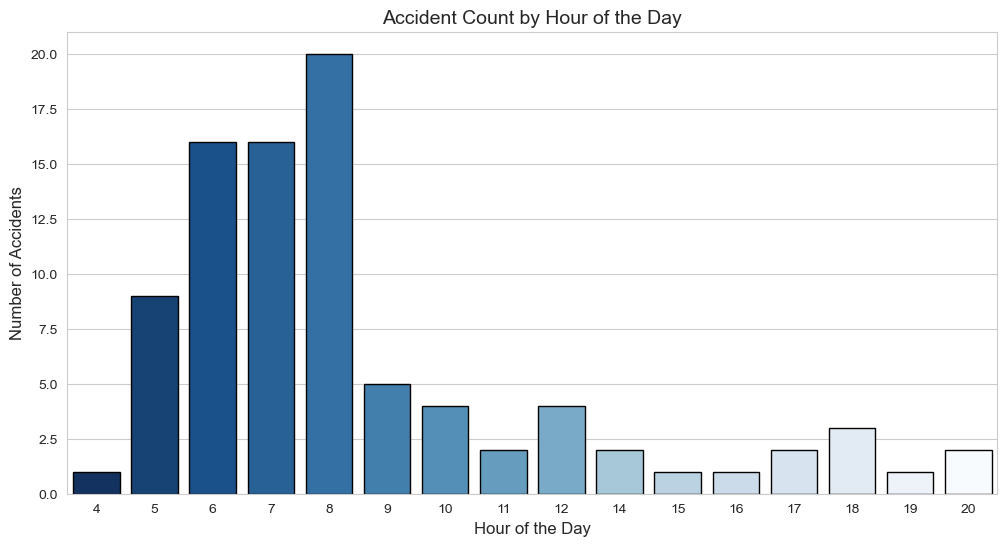

In [57]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])


df["Hour"] = df["Start_Time"].dt.hour
df["Weekday"] = df["Start_Time"].dt.day_name()
df["Month"] = df["Start_Time"].dt.month_name()


season_map = {
    "December": "Winter", "January": "Winter", "February": "Winter",
    "March": "Spring", "April": "Spring", "May": "Spring",
    "June": "Summer", "July": "Summer", "August": "Summer",
    "September": "Fall", "October": "Fall", "November": "Fall"
}
df["Season"] = df["Month"].map(season_map)


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Hour", data=df, hue="Hour", palette="Blues_r", legend=False, edgecolor="black")
plt.title("Accident Count by Hour of the Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.15, p.get_height() + 50), fontsize=10)

plt.xticks(rotation=0)
plt.show()



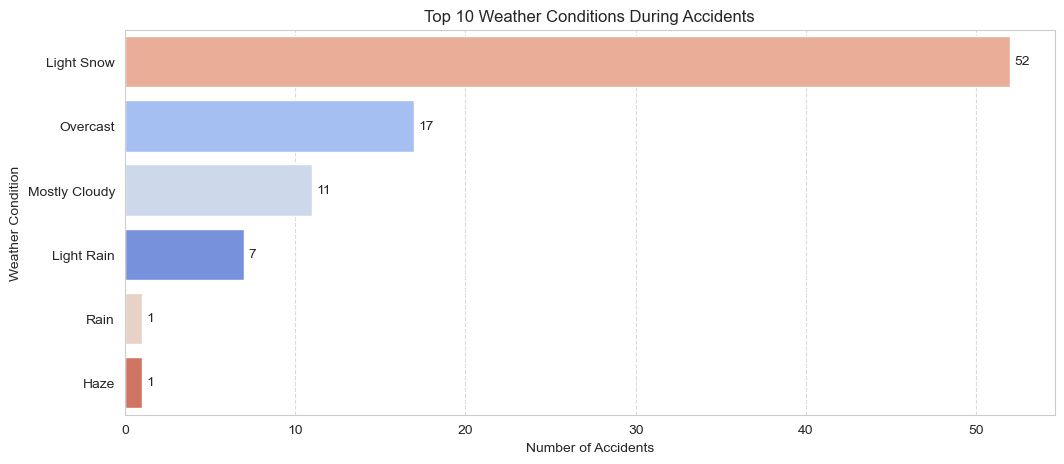

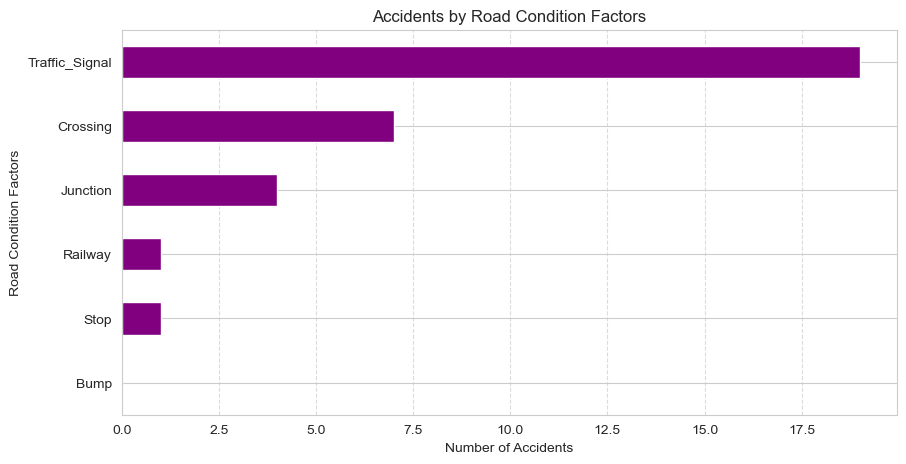

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 5))
top_weather_conditions = df["Weather_Condition"].value_counts().nlargest(10).index 
ax = sns.countplot(
    y="Weather_Condition",
    data=df,
    order=top_weather_conditions,
    hue="Weather_Condition",  
    legend=False,  
    palette="coolwarm"
)
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")


for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", padding=3)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


road_conditions = ["Traffic_Signal", "Junction", "Bump", "Crossing", "Stop", "Railway"]

plt.figure(figsize=(10, 5))
ax2 = df[road_conditions].sum().sort_values().plot(kind="barh", color="purple")
plt.title("Accidents by Road Condition Factors")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Condition Factors")



plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



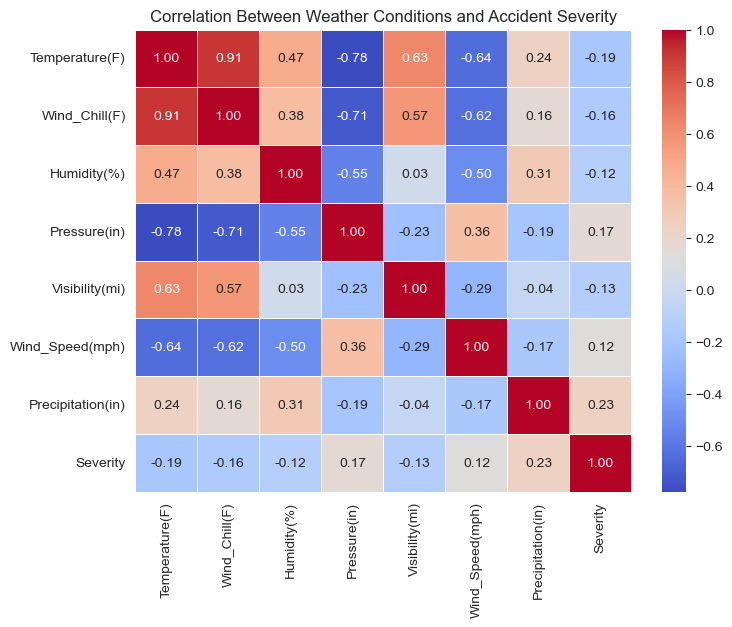

In [28]:
import numpy as np


weather_cols = ["Temperature(F)", "Wind_Chill(F)", "Humidity(%)", "Pressure(in)", 
                "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]

correlation_matrix = df[weather_cols + ["Severity"]].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Weather Conditions and Accident Severity")
plt.show()


In [69]:
import pandas as pd
import folium
from folium.plugins import HeatMap


df = pd.read_csv("Test.csv")  


map_center = [df["Start_Lat"].median(), df["Start_Lng"].median()]
accident_map = folium.Map(location=map_center, zoom_start=10)


heat_data = df[["Start_Lat", "Start_Lng"]].dropna().values.tolist()


HeatMap(heat_data, radius=10).add_to(accident_map)


accident_map.save("accident_hotspot_map.html")


from IPython.display import IFrame
IFrame("accident_hotspot_map.html", width=800, height=500)



#  Main Takeaway from Data Analysis 🚦📊

## The most influential factor affecting accident severity is precipitation (correlation: 0.23).

  ->Higher precipitation (rain/snow) significantly increases accident severity.
 
  ->Low temperature and wind chill also contribute to more severe accidents (negative correlation with severity).
 
  ->Better visibility and lower humidity reduce accident severity.